# core

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [6]:
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
#| hide
import geopandas as gpd
import matplotlib.pyplot as plt
# optimise position of map labels
import adjustText as aT

In [ ]:
#|export

def plot_wards(title='', suptitle='', ward_labels=False):
    "shows the wards of tower hamlets"
    try:
        wards = gpd.read_file('../data/external/tower-hamlets-wards.geojson')
    except Exception:
        wards = gpd.read_file('https://gist.github.com/joel-lbth/6d2c78c52163b7da1d91089c9bd849cf/raw/1ece7857aff95a3729d76313d63bd9cbb495491a/lbth-wards.geojson')
        wards.to_file('../data/external/tower-hamlets-wards.geojson', driver='GeoJSON')
    fig, ax = plt.subplots(1, 1, figsize=(12, 9), dpi=150, facecolor="w")
    if suptitle != '':
        plt.suptitle('suptitle', fontsize=16, y=0.95, x=0.5)
    if title != '':
        plt.title('title', fontsize=11, x=0.5)
    wards.plot(ax=ax, facecolor="none", linewidth=2, edgecolor="#222")
    wards.bo
    texts = []
    ax.axis("off")
    if ward_labels:
        wards.apply(lambda x: texts.append(ax.text(
                s=x['name'], 
                x=x.geometry.centroid.x, 
                y=x.geometry.centroid.y, 
                ha='center', 
                bbox={"facecolor": "w", "alpha": 0.6, "boxstyle": "round"}
            )),
            axis=1)
        aT.adjust_text(
            texts,
            force_points=0.3,
            force_text=0.8,
            expand_points=(1, 1),
            expand_text=(1, 1),
        )
    return fig, ax


In [19]:
wards = gpd.read_file('https://gist.github.com/joel-lbth/6d2c78c52163b7da1d91089c9bd849cf/raw/1ece7857aff95a3729d76313d63bd9cbb495491a/lbth-wards.geojson')


array([-8.016000e-02,  5.148450e+01,  9.890000e-03,  5.154469e+01])

In [39]:
[w for w in wards.total_bounds] 

[-0.08016, 51.4845, 0.00989, 51.54469]

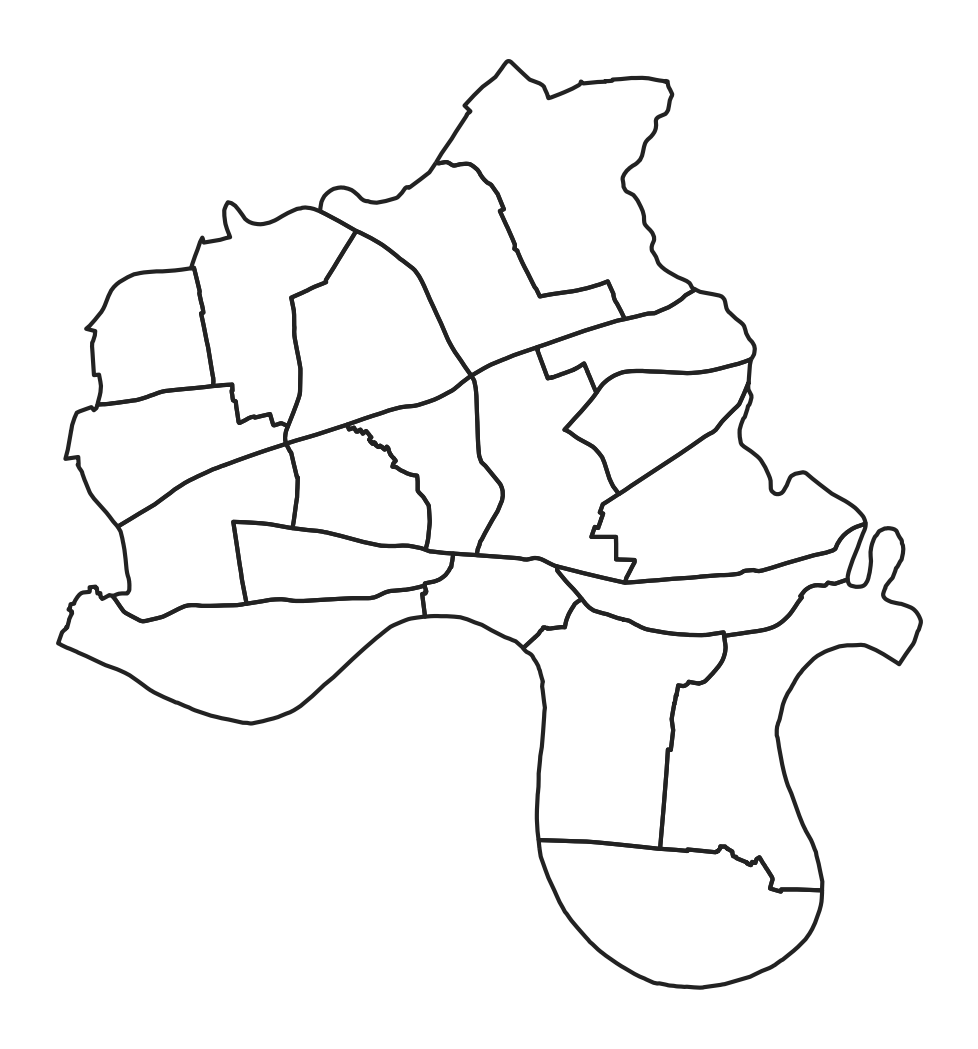

In [ ]:
fig, ax = plot_wards()